In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [24]:
img_generator = keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)

In [25]:
root_dir = 'C:/Users/User/Documents/caltech-101/101_ObjectCategories'
img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


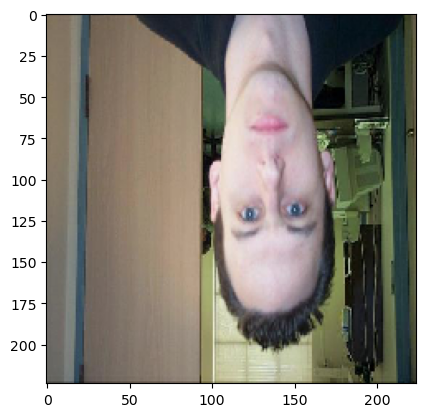

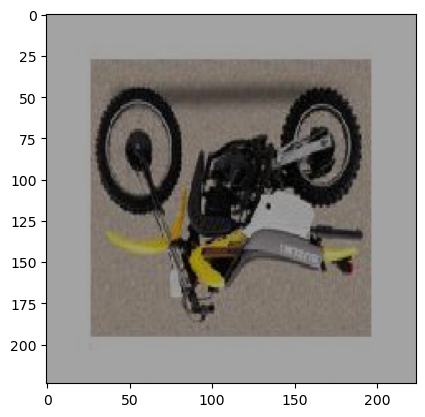

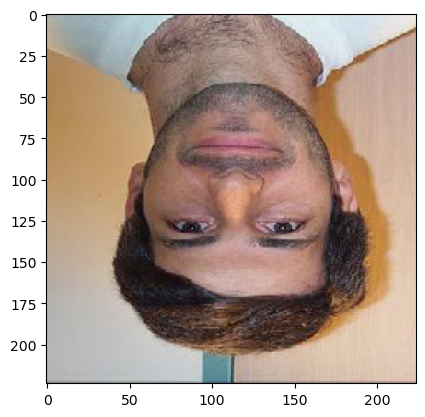

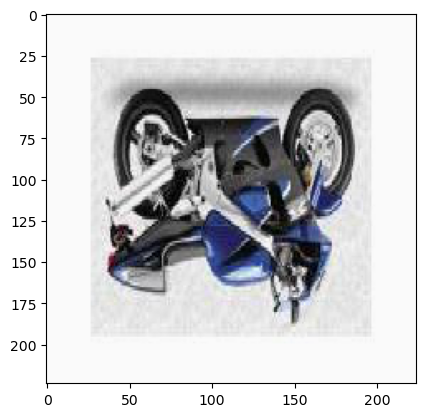

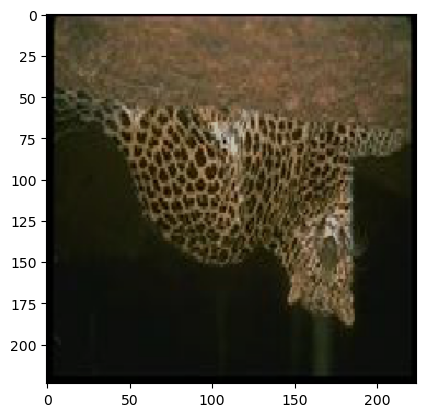

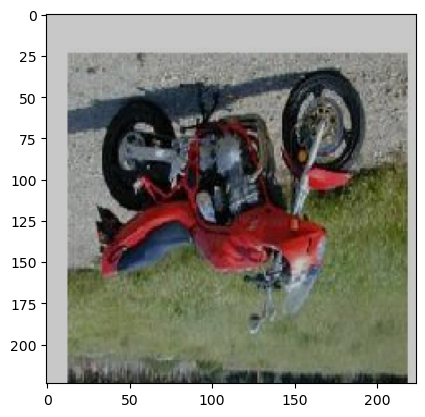

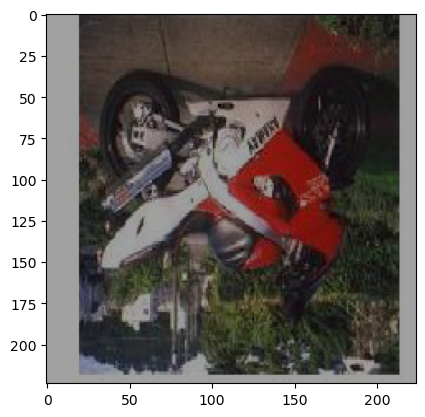

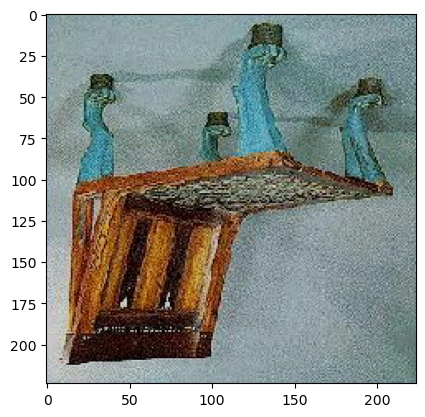

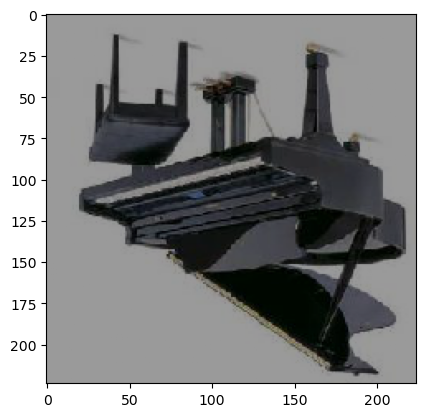

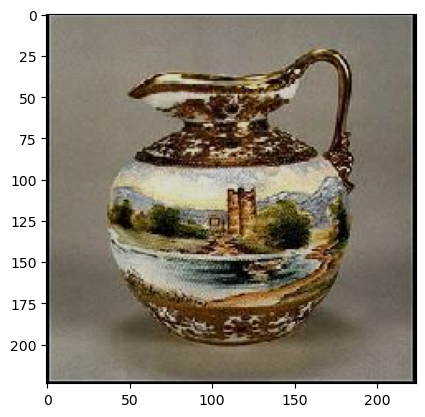

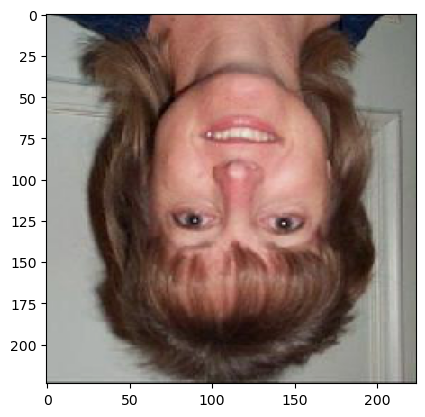

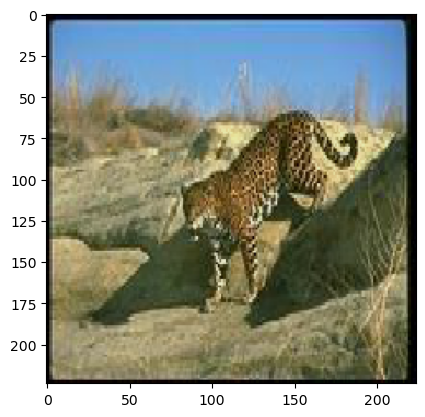

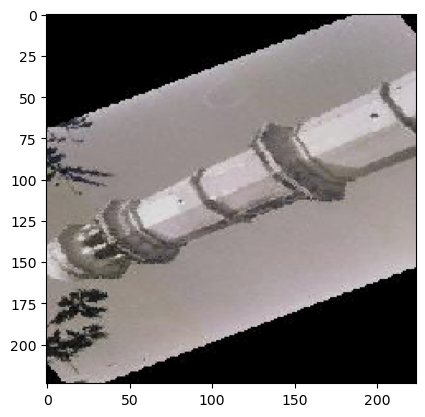

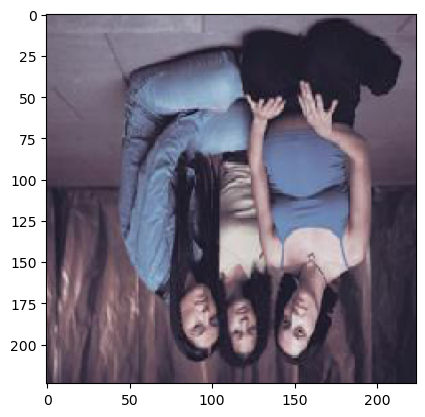

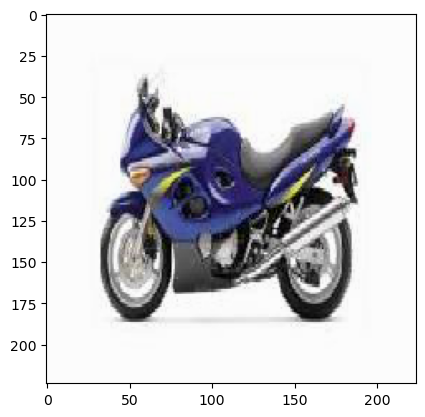

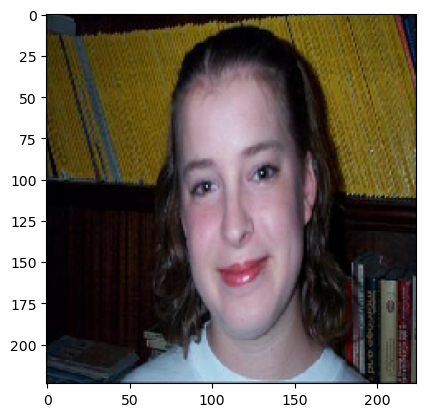

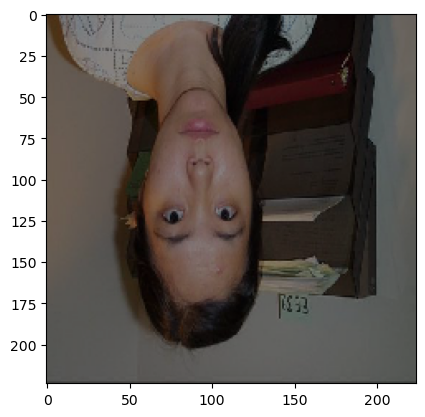

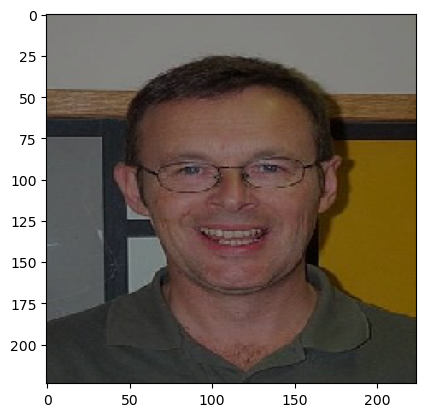

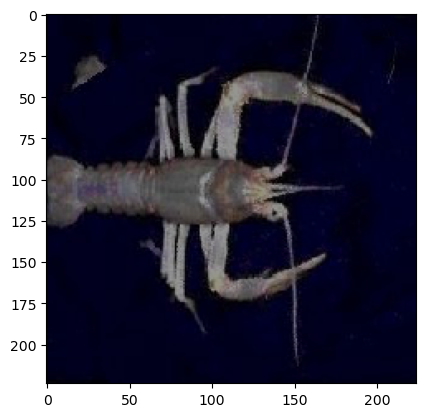

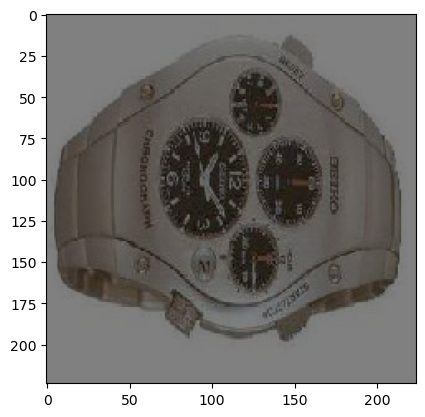

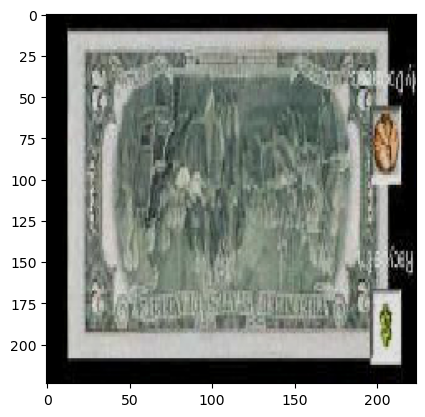

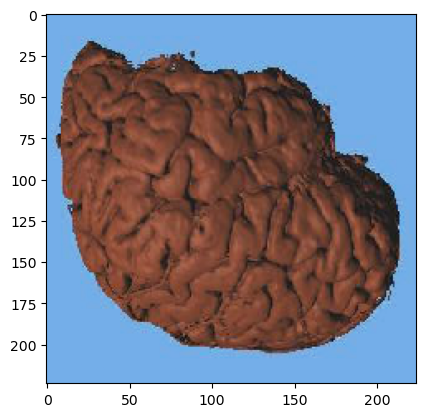

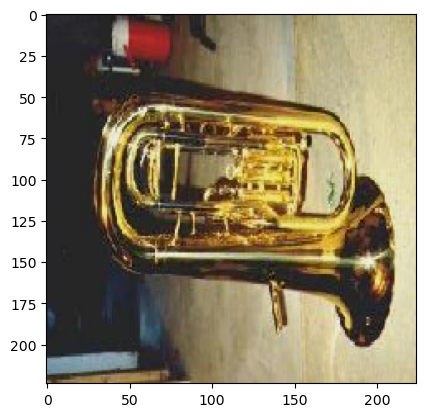

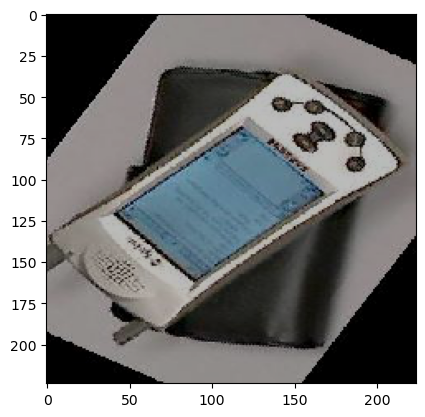

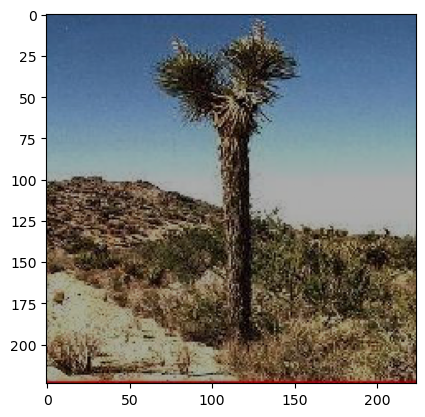

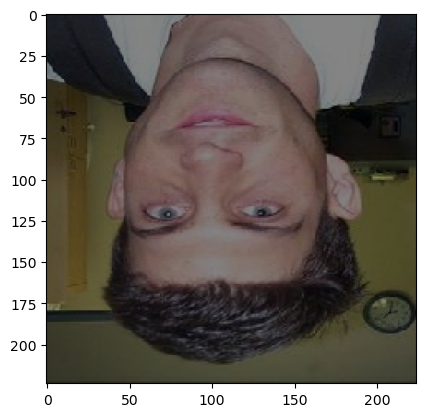

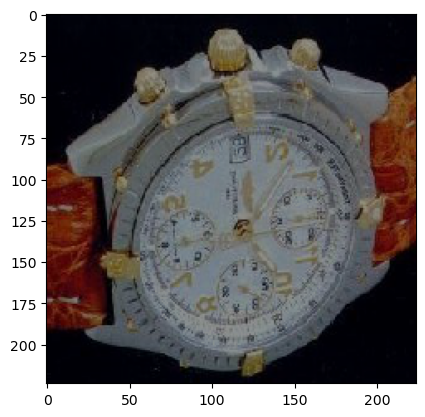

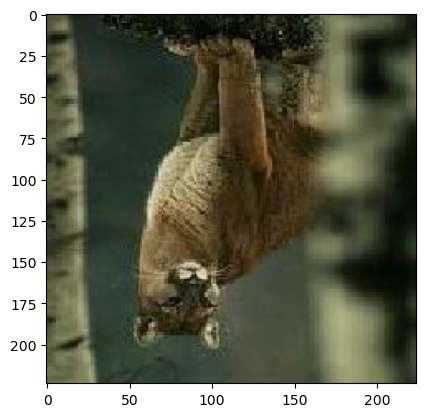

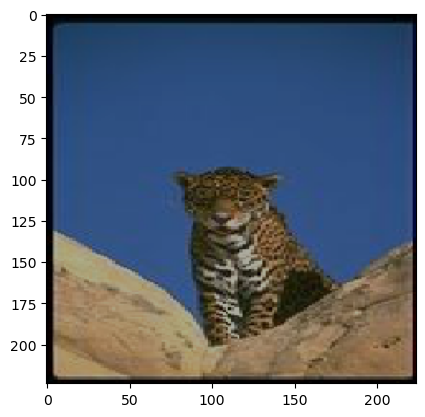

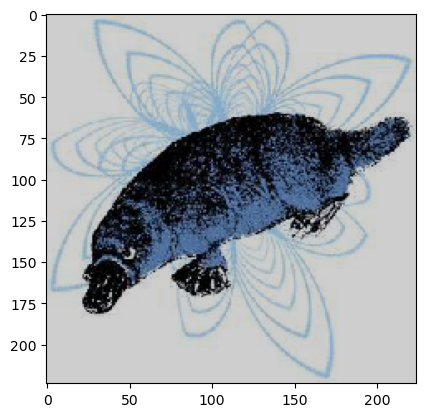

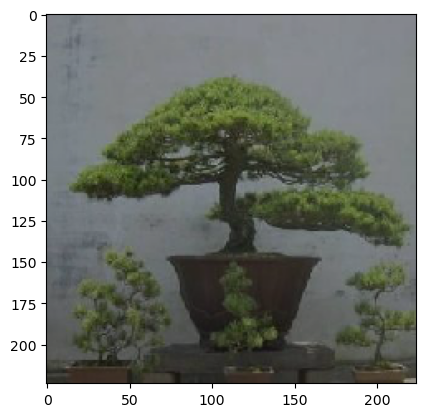

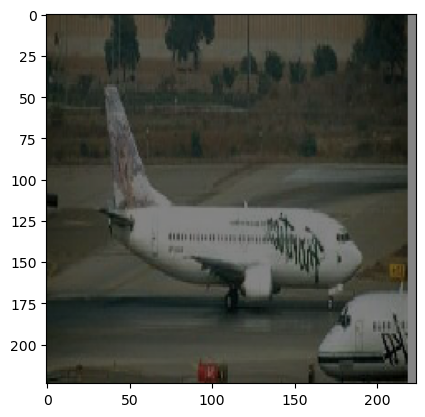

32

In [26]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()
    

#### a. Load in a pretrained model (InceptionV3)

In [27]:
base_model = keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [28]:
base_model.trainable = False

####  c. Add custom classifier with several layers of trainable parameters to model

In [29]:
model = keras.Sequential([
    base_model,
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(102, activation="softmax")
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               835686    
                                                                 
Total params: 22638470 (86.36 MB)
Trainable params: 835686 (3.19 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


#### d. Train classifier layers on training data available for task

In [31]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),
              loss = keras.losses.CategoricalCrossentropy(),
              metrics = [keras.metrics.CategoricalAccuracy()])

In [32]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=2) #20,50

Epoch 1/2
20/20 [==============================] - 235s 12s/step - loss: 8.4108 - categorical_accuracy: 0.2828 - val_loss: 5.1391 - val_categorical_accuracy: 0.4104
Epoch 2/2
20/20 [==============================] - 255s 13s/step - loss: 2.9680 - categorical_accuracy: 0.6031 - val_loss: 3.1945 - val_categorical_accuracy: 0.5804


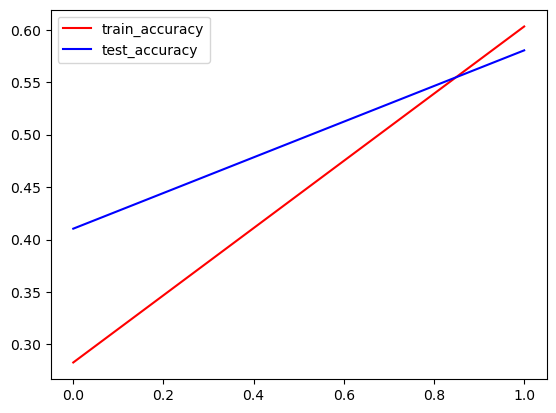

In [33]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [34]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [35]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=2) #20,50

Epoch 1/2
20/20 [==============================] - 477s 24s/step - loss: 3.4824 - categorical_accuracy: 0.4156 - val_loss: 199.6176 - val_categorical_accuracy: 0.0481
Epoch 2/2
20/20 [==============================] - 472s 24s/step - loss: 3.1179 - categorical_accuracy: 0.3766 - val_loss: 490.1375 - val_categorical_accuracy: 0.0359


1/1 [==============================] - 4s 4s/step
Predicted:  butterfly
Actual:  platypus


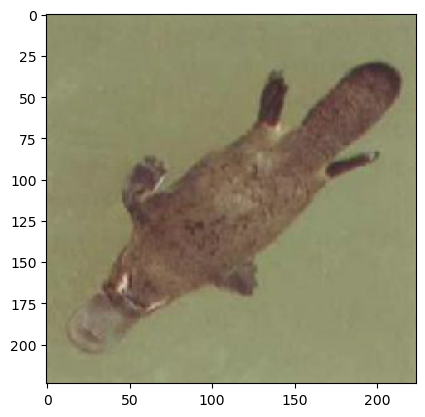

In [71]:

imgs, labels = next(iter(img_generator_flow_valid))


predicted_values = model.predict(imgs)


class_labels = list(img_generator_flow_train.class_indices.keys())


image_index = 0

plt.imshow(imgs[image_index])
predicted_label = class_labels[np.argmax(predicted_values[image_index])]
actual_label = class_labels[np.argmax(labels[image_index])]
print("Predicted: ", predicted_label)
print("Actual: ", actual_label)
plt.show()

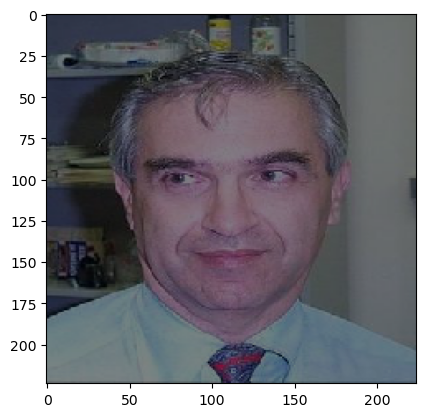

In [72]:
plt.imshow(imgs[2])